In [1]:
from __future__ import division
import os, sys, time, random
import math
import scipy
from scipy import constants
import torch
from torch import nn, optim
from torch import autograd
from torch.autograd import grad
import autograd.numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from torch.nn import functional as F
from scipy.constants import pi


In [16]:
class Potential(nn.Module):
    def __init__(self):
        super(Potential,self).__init__()
        self.hidden0 = nn.Sequential(
            nn.Linear(1,128),
            nn.Tanh()
        )
#         self.hidden1 = nn.Sequential(
#             nn.Linear(32,128),
#             nn.Tanh()
#         )
        self.hidden1 = nn.Sequential(
            nn.Linear(128,128),
            nn.Tanh()
        )
        self.out = nn.Sequential(
            nn.Linear(128,1)
          # nn.Sigmoid()
        )
    def forward(self, x):
        x = self.hidden0(x)
        x = x + self.hidden1(x)
       # x = x + self.hidden2(x)
        x = self.out(x)
        return x

In [17]:
def function_1(x,y,k):
    sech1=(1-(torch.tanh(x+(y/2))**2))
    sech2=(1-(torch.tanh(x-(y/2))**2))
    sinh=torch.sinh(x + y/2)*torch.sinh(x - y/2)
    val=2*sech1*sech2*sinh*torch.cos(-k*y)
    return val

def function_2(x,y,k):
    sech1=(1-(torch.tanh(x+(y/2))**2))
    sech2=(1-(torch.tanh(x-(y/2))**2))
    val = sech1*sech2*torch.cos(-k*y)
    return val

def function_3(x,y,k,t):
    sech1=(1-(torch.tanh(x+(y/2))**2))
    sech2=(1-(torch.tanh(x-(y/2))**2))
    val = np.sqrt(2)*sech1*sech2*(torch.sinh(x-(y/2))*torch.cos((3*t)/2 - k*y)+torch.sinh(x+(y/2))*torch.cos(-(3*t)/2 - k*y))
    return val
                                  
                                  
                                  

In [18]:
def trapz_1(x,k, N=4000):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    y = torch.linspace(0,20,N+1) 
    count = 0# N+1 points make N subintervals
    #x=np.arange(a, b, N+1)
    #x = torch.from_numpy(x)
    integral=torch.zeros_like(x)
    for x1,k1 in zip(x,k):
        x2 = x1.repeat_interleave(N+1)
        k2 = k1.repeat_interleave(N+1)
        val = function_1(x2,y,k2)
       # print(val.shape)
        val_right = val[1:]
      #  print(val_right.shape)
        
        val_left = val[:-1]
#     z = f(y)
#     z_right = z[1:] # right endpoints
#     z_left = z[:-1] # left endpoints
        dy = 20/N
        T = (dy/2) * torch.sum(val_left+val_right)
        integral[count]=T
        count+=1
       # print(integral)
    return integral

In [19]:
def trapz_2(x,k, N=4000):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    y = torch.linspace(0,20,N+1) 
    count = 0# N+1 points make N subintervals
    #x=np.arange(a, b, N+1)
    #x = torch.from_numpy(x)
    integral=torch.zeros_like(x)
    for x1,k1 in zip(x,k):
        x2 = x1.repeat_interleave(N+1)
        k2 = k1.repeat_interleave(N+1)
        val = function_2(x2,y,k2)
       # print(val.shape)
        val_right = val[1:]
      #  print(val_right.shape)
        
        val_left = val[:-1]
#     z = f(y)
#     z_right = z[1:] # right endpoints
#     z_left = z[:-1] # left endpoints
        dy = 20/N
        T = (dy/2) * torch.sum(val_left+val_right)
        integral[count]=T
        count+=1
       # print(integral)
    return integral

In [20]:
def trapz_3(x,k,t, N=5000):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    y = torch.linspace(0,20,N+1) 
    count = 0# N+1 points make N subintervals
    #x=np.arange(a, b, N+1)
    #x = torch.from_numpy(x)
    integral=torch.zeros_like(x)
    for x1,k1,t1 in zip(x,k,t):
        x2 = x1.repeat_interleave(N+1)
        k2 = k1.repeat_interleave(N+1)
        t2 = t1.repeat_interleave(N+1)
        val = function_3(x2,y,k2,t2)
       # print(val.shape)
        val_right = val[1:]
      #  print(val_right.shape)
        
        val_left = val[:-1]
#     z = f(y)
#     z_right = z[1:] # right endpoints
#     z_left = z[:-1] # left endpoints
        dy = 20/N
        T = (dy/2) * torch.sum(val_left+val_right)
        integral[count]=T
        count+=1
       # print(integral)
    return integral

In [21]:
h = .001

def taylor_approx_k(batch): 
    batch.requires_grad_(True)
    k_coord = batch[:,1] 
    k_coord.requires_grad_(True)
    k_coord1 = k_coord + h
    k_coord2 = k_coord - h
    k_coord3 = k_coord + (2*h)
    k_coord4 = k_coord - (2*h)
    
    x_coord = batch[:,1] 
    x_coord.requires_grad_(True)
    
    t_coord = batch[:,2] 
    t_coord.requires_grad_(True)
    
 
    wigner2_forward = (3/4)*(trapz_1(x_coord,k_coord3,N=4000)+trapz_2(x_coord,k_coord3,N=4000)+trapz_3(x_coord,k_coord3,t_coord,N=5000))
    wigner2_back = (3/4)*(trapz_1(x_coord,k_coord4,N=4000)+trapz_2(x_coord,k_coord4,N=4000)+trapz_3(x_coord,k_coord4,t_coord,N=5000))
    
    wigner1_forward = (3/4)*(trapz_1(x_coord,k_coord1,N=4000)+trapz_2(x_coord,k_coord1,N=4000)+trapz_3(x_coord,k_coord1,t_coord,N=5000))
    wigner1_back = (3/4)*(trapz_1(x_coord,k_coord2,N=4000)+trapz_2(x_coord,k_coord2,N=4000)+trapz_3(x_coord,k_coord2,t_coord,N=5000))
   
    
    partial_k = (wigner2_forward - wigner2_back -2*(wigner1_forward-wigner1_back))/(2*(h**3))
                         
  
    return partial_k


In [22]:
potential = Potential()
optimizer = torch.optim.Adam(potential.parameters(), lr = .001)

#implementing the wigner-Moyal loss
def wigner_moyal_loss(batch):
    x_coord = batch[:,0] 
    x_coord.requires_grad_(True)
  #  x_coord =x_coord.view(-1, *x_coord.size()).t()
    k_coord = batch[:,1]
    t_coord = batch[:,2]
    k_coord.requires_grad_(True)
    t_coord.requires_grad_(True)
    
 
    wigner = (3/4)*(trapz_1(x_coord,k_coord,N=4000)+trapz_2(x_coord,k_coord,N=4000)+trapz_3(x_coord,k_coord,t_coord,N=5000))
    dwdt = grad(wigner, t_coord, grad_outputs = torch.ones_like(t_coord), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
                         
    dwdx = grad(wigner, x_coord, grad_outputs = torch.ones_like(x_coord), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
                         
    dwdk = grad(wigner, k_coord, grad_outputs = torch.ones_like(k_coord), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
                         
    x_coord1 =x_coord.view(-1, *x_coord.size()).t()
    U = potential(x_coord1)
                         
    du = grad(U, x_coord, grad_outputs = torch.ones_like(U), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
                         
    ddu = grad(du, x_coord, grad_outputs = torch.ones_like(du), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
                         
    d3u = grad(ddu, x_coord, grad_outputs = torch.ones_like(ddu), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
    der1 = du.squeeze()
    der3 = d3u.squeeze()
                         
    val = dwdt + torch.mul(k_coord,dwdx) - torch.mul(der1, dwdk) + 1/24*torch.mul(der3,taylor_approx_k(batch))
                         
    return val


In [23]:
#implementing the Louiville loss
def louiville_loss(batch):
    x_coord = batch[:,0] 
    x_coord.requires_grad_(True)
  #  x_coord =x_coord.view(-1, *x_coord.size()).t()
    k_coord = batch[:,1]
    t_coord = batch[:,2]
    k_coord.requires_grad_(True)
    t_coord.requires_grad_(True)
    wigner = (3/4)*(trapz_1(x_coord,k_coord,N=2000)+trapz_2(x_coord,k_coord,N=2000)+trapz_3(x_coord,k_coord,t_coord,N=2000))
 
    wigner.requires_grad_(True)
    dwdt = grad(wigner, t_coord, grad_outputs = torch.ones_like(t_coord), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
  
                         
    dwdx = grad(wigner, x_coord, grad_outputs = torch.ones_like(x_coord), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
 
                         
    dwdk = grad(wigner, k_coord, grad_outputs = torch.ones_like(k_coord), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
                         
    x_coord1 =x_coord.view(-1, *x_coord.size()).t()
    U = potential(x_coord1)
                         
    du = grad(U, x_coord, grad_outputs = torch.ones_like(U), 
                     create_graph=True, retain_graph=True, 
                  only_inputs=True,
                    allow_unused=True
                 )[0]
                         
   
    der1 = du.squeeze()
    
   
                         
    val = dwdt + torch.mul(k_coord,dwdx) - torch.mul(der1, dwdk) 
                         
    return val

In [24]:
class MyDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data.float()
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        if self.transform:
            x = self.transform(x)
        return x

    def __len__(self):
        return len(self.data)

In [27]:
data = torch.rand(5000,3)
dataset = MyDataset(data)
loader = DataLoader(dataset, batch_size = 32, shuffle = True)
#choose which loss function you want to use: Wigner_loss is the Wigner_Moyal loss 
wigner_loss = False

In [ ]:
num_epochs = 1000
h1 = .001
loss = []
#need 3 initial conditions for wigner_moyal but 1 for Louiville 
x = torch.tensor([0.0])
for epoch in range(num_epochs):
    for n_batch, batch in enumerate(loader):
        n_data = Variable(batch, requires_grad=True)
   
        optimizer.zero_grad()
      
        if wigner_loss == True:
            error = (wigner_moyal_loss(n_data)**2).mean() + (potential(x)+3)**2 + ((potential(x+h1)-potential(x-h1))/2*h1)**2 + \
                   (((potential(x+h1)+potential(x-h1)-2*potential(x))/(2*(h1**2)))-6)**2
        else:
            error = (louiville_loss(n_data)**2).mean() + (potential(x)+3)**2
       
        error.backward(retain_graph=True)
      # torch.nn.utils.clip_grad_norm_(potential.parameters(), .9)
       
        optimizer.step()
    loss.append(error)
  

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, title, show, xlabel, ylabel, legend

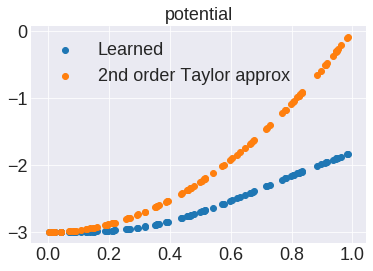

In [32]:
x = torch.rand(100,1)
plt.scatter(x.detach().numpy(), potential(x).detach().numpy())
plt.scatter(x, -3+(3*x**2))
plt.title("potential")
plt.legend(['Learned', '2nd order Taylor approx'])
plt.show()

The rest of the notebook is devoted to generating the figures in the main text and can be ignored. 

In [9]:
x1 = torch.rand(1000)
y = 3*(torch.tanh(x1)**2 - 1).numpy()
output_initial=[]
for i in range(0,len(y)):
    output_initial.append((x1.numpy()[i],y[i]))
sorted_initial = sorted(output_initial, key=lambda x: x[0])


In [10]:
x_initial=[]
y_initial=[]
for a in sorted_initial:
    x_initial.append(a[0])
    y_initial.append(a[1])

In [11]:
y1 = -3+3*(x1)**2

In [12]:
output_approx=[]
for i in range(0,len(y1)):
    output_approx.append((x1.numpy()[i],y1[i]))
sorted_approx = sorted(output_approx, key=lambda x: x[0])

In [13]:
x_approx =[]
y_approx =[]
for a in sorted_approx:
    x_approx.append(a[0])
    y_approx.append(a[1])

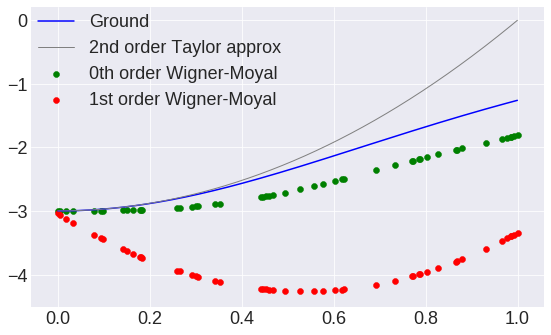

In [15]:
plt.style.use('seaborn-darkgrid')
#potential = the potential calculated by Louiville equation and potential1 is by the Wigner_Moyal loss


# create a color palette
palette = plt.get_cmap('Set1')
x1 = torch.rand(50,1)
fig = plt.figure(figsize=[8, 5])
#ax = fig.add_subplot()
# ax.set_title('Ground and Learned Potentials')
#ax.set_xlabel('Position')
#ax.set_ylabel('Potential')
plt.plot(x_initial,y_initial,color='b',linewidth=1.5)
plt.plot(x_approx,y_approx,color ='gray', linewidth=1)
#plt.plot(x_perturb,y_perturb, color='r', linewidth=1.5)
plt.scatter(x1, potential(x1).detach().numpy(),color='g',linestyle='-',marker='o',linewidth=0.5)
plt.scatter(x1, potential1(x1).detach().numpy(),color='r',linestyle='-',marker='o',linewidth=0.5)

#plt.plot(xsorted,potsorted,color='g',linewidth='1',alpha=0.5)
# Create an inset outside the axes
# plt.suptitle("Ground and Learned Potentials", fontsize=13, fontweight=0, color='black', style='italic')

plt.legend(['Ground','2nd order Taylor approx','0th order Wigner-Moyal', '1st order Wigner-Moyal'],loc='upper left', borderaxespad=0.0)
#plt.legend(['Initial','Perturbed','Learned'], loc='upper right', borderaxespad=0.0)
# Create an inset with a 2-tuple bounding box. Note that this creates a
# bbox without extent. This hence only makes sense when specifying
# width and height in absolute units (inches).
# axins2 = inset_axes(ax, width=2, height=1.3,
#                     bbox_to_anchor=(0.05, 0.55),
#                     bbox_transform=ax.transAxes, loc=3, borderpad=1)

# axins2.plot(xgroundsorted,potgroundsorted,label='Ground',color='b')
# axins2.set_xlabel('Position')
# axins2.set_ylabel('Potential')
# axins2.set_title('Ground Potential')

# axins3 = inset_axes(ax, width=2, height=1.3,
#                     bbox_to_anchor=(0.39, 0.55),
#                     bbox_transform=ax.transAxes, loc=3, borderpad=1)
# axins3.plot(xgroundsorted,potsorted,label='Learned',color='g')
# axins3.set_xlabel('Position')
# axins3.set_ylabel('Potential')
# axins3.set_title('Learned Potential')
ax = fig.add_subplot()
major_ticks_x = np.arange(0, 1, .2)
minor_ticks_x = np.arange(0, 1, .2)
major_ticks_y = np.arange(-4, 0, 1)
minor_ticks_y = np.arange(-4, 0, 1)
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18) 
plt.rc('font', size=18)
plt.rc('axes', titlesize=18) 
#plt.savefig('wigner_janky.png', dpi=1200)
# ax.set_xticks(major_ticks_x)
# ax.set_xticks(minor_ticks_x, minor=True)
# ax.set_yticks(major_ticks_y)
# ax.set_yticks(minor_ticks_y, minor=True)
plt.tight_layout()
#plt.savefig('wigner_janky.png', dpi=1200)